In [1]:

% =========================================================
% ====================   Parameters   =====================

% ------------- Material properties -----------------------
E   = 200e6  ;  % Young modulus
nu  = 0.25   ;  % Poisson modulus

% -------------------- Mesh properties -------------------
L   = [1 4.0 ]' ;  % L(i) dimension in ith direction
t   = 0.2   ;  % thickness

% --- mesh ---
nx  = 10      ;  % number of divisions in direction x
ny  = 20      ;  % number of divisions in direction y
nel = [ nx ny ]' ; 

% ------------- Mesh Construction  ----------------
nnos    = nel + 1          ;  % nnos(i): number of noos in the i-th direction
nnostot = nnos(1)*nnos(2)  ;  % total nodes number

% ---------------- Boundary Conditions --------------------
q   = 1e6  ;  % distributed load on the up_edge
%~ LoadNodes = ( ( (nnos(2)-1) * nnos(1)+1 ) : ( nnos(2)*nnos(1)) ) ; 
startloadnode = (nnos(2)-1) * nnos(1)+1 ;
endinloadnode = nnos(1) * nnos(2)     ;
LoadNodes = ( startloadnode : endinloadnode )' ; 

% --- nodes cordinates matrix ---
lins1   = linspace( 0 , L(1) , nnos(1) )';
lins2   = linspace( 0 , L(2) , nnos(2) )';

In [2]:
% =========================================================
% =================     Preprocessing     =================

% --- Constitutive Matrix ---
% matrix for plain strees state
C = E / (1-nu^2) * [ 1   nu  0           ; ...
                     nu  1   0           ; ...
                     0   0   (1-nu )/2 ] ;


nodes = [] ;  % nodes first column x-coord  second column y-coord

for i = 1:nnos(2) % discretiza primero por y
  nodes( ( (nnos(1) * (i-1) + 1) : nnos(1)*i ) ,:) = [ lins1 lins2(i)*ones(nnos(1),1) ] ;
end

In [3]:
size(nodes)

ans =

   231     2



In [4]:
nodes

nodes =

   0.00000   0.00000
   0.10000   0.00000
   0.20000   0.00000
   0.30000   0.00000
   0.40000   0.00000
   0.50000   0.00000
   0.60000   0.00000
   0.70000   0.00000
   0.80000   0.00000
   0.90000   0.00000
   1.00000   0.00000
   0.00000   0.20000
   0.10000   0.20000
   0.20000   0.20000
   0.30000   0.20000
   0.40000   0.20000
   0.50000   0.20000
   0.60000   0.20000
   0.70000   0.20000
   0.80000   0.20000
   0.90000   0.20000
   1.00000   0.20000
   0.00000   0.40000
   0.10000   0.40000
   0.20000   0.40000
   0.30000   0.40000
   0.40000   0.40000
   0.50000   0.40000
   0.60000   0.40000
   0.70000   0.40000
   0.80000   0.40000
   0.90000   0.40000
   1.00000   0.40000
   0.00000   0.60000
   0.10000   0.60000
   0.20000   0.60000
   0.30000   0.60000
   0.40000   0.60000
   0.50000   0.60000
   0.60000   0.60000
   0.70000   0.60000
   0.80000   0.60000
   0.90000   0.60000
   1.00000   0.60000
   0.00000   0.80000
   0.10000   0.80000
   0.20000   0.80000
   0

In [5]:
% --- Conectivity Matrix ---
Mcon = []; %conectivity matrix
for j = 1:nel(2)
  for i = 1:nel(1)
    intri1 = 2*(i-1)+1+2*(j-1)*nx ;
    intri2 = intri1 + 1           ;
    Mcon( intri1 , : ) = [ j*nnos(1)+i    (j-1)*nnos(1)+i  j*nnos(1)+i+1     ] ;
    Mcon( intri2 , : ) = [ j*nnos(1)+i+1  (j-1)*nnos(1)+i  (j-1)*nnos(1)+i+1 ] ; 
  end
end

In [6]:
function v= nodes2dofs (u)
for i=1:length(u)
    v(2*i-1:2*i)=[ 2*u(i)-1 2*u(i)];        
end
end

In [7]:

% --- Degrees of freedom fix and free ---
FixNodes  = ( 1:nnos(1) )'          ;
FixDofs   = nodes2dofs ( FixNodes )% first add all dofs of the nodes 

FixDofs =

 Columns 1 through 16:

    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16

 Columns 17 through 22:

   17   18   19   20   21   22



In [8]:
3:2:(length(FixDofs)-2)

ans =

    3    5    7    9   11   13   15   17   19



In [9]:
FixDofs (3:2:(length(FixDofs)-2)) = [] % then remove the free dofs of the nodes

FixDofs =

    1    2    4    6    8   10   12   14   16   18   20   21   22



In [10]:
% free degrees of fredom
LibDofs = 1:2*nnostot ;
LibDofs ( FixDofs) = []

LibDofs =

 Columns 1 through 13:

     3     5     7     9    11    13    15    17    19    23    24    25    26

 Columns 14 through 26:

    27    28    29    30    31    32    33    34    35    36    37    38    39

 Columns 27 through 39:

    40    41    42    43    44    45    46    47    48    49    50    51    52

 Columns 40 through 52:

    53    54    55    56    57    58    59    60    61    62    63    64    65

 Columns 53 through 65:

    66    67    68    69    70    71    72    73    74    75    76    77    78

 Columns 66 through 78:

    79    80    81    82    83    84    85    86    87    88    89    90    91

 Columns 79 through 91:

    92    93    94    95    96    97    98    99   100   101   102   103   104

 Columns 92 through 104:

   105   106   107   108   109   110   111   112   113   114   115   116   117

 Columns 105 through 117:

   118   119   120   121   122   123   124   125   126   127   128   129   130

 Columns 118 through 130:

   131   132   

In [11]:

% --- Build Elements coordinates vectors
neltotal = 2*nel(1)*nel(2); % number of elements

for i = 1:neltotal
    Xel(:,i) = (nodes( Mcon(i,:) , 1 )) ; % on j column has de x of the j-th element 
    Yel(:,i) = (nodes( Mcon(i,:) , 2 )) ; % on j column has de y of the j-th element 
end

In [12]:
Xel

Xel =

 Columns 1 through 8:

   0.00000   0.10000   0.10000   0.20000   0.20000   0.30000   0.30000   0.40000
   0.00000   0.00000   0.10000   0.10000   0.20000   0.20000   0.30000   0.30000
   0.10000   0.10000   0.20000   0.20000   0.30000   0.30000   0.40000   0.40000

 Columns 9 through 16:

   0.40000   0.50000   0.50000   0.60000   0.60000   0.70000   0.70000   0.80000
   0.40000   0.40000   0.50000   0.50000   0.60000   0.60000   0.70000   0.70000
   0.50000   0.50000   0.60000   0.60000   0.70000   0.70000   0.80000   0.80000

 Columns 17 through 24:

   0.80000   0.90000   0.90000   1.00000   0.00000   0.10000   0.10000   0.20000
   0.80000   0.80000   0.90000   0.90000   0.00000   0.00000   0.10000   0.10000
   0.90000   0.90000   1.00000   1.00000   0.10000   0.10000   0.20000   0.20000

 Columns 25 through 32:

   0.20000   0.30000   0.30000   0.40000   0.40000   0.50000   0.50000   0.60000
   0.20000   0.20000   0.30000   0.30000   0.40000   0.40000   0.50000   0.50000
  

In [13]:
size(Yel)

ans =

     3   400



In [14]:
% calculates element matrices for clockwise numeration
function [K] = KT3 ( x , y , C , t )

A=det( [ ones(1,3) ; x' ; y' ] )/2; % element area
    
B= 1 / (2*A) * [ y(2)-y(3)  0          y(3)-y(1)  0          y(1)-y(2)  0          ;
                 0          x(3)-x(2)  0          x(1)-x(3)  0          x(2)-x(1)  ;
                 x(3)-x(2)  y(2)-y(3)  x(1)-x(3)  y(3)-y(1)  x(2)-x(1)  y(1)-y(2)  ];
K= B' * C * B * A * t ;
end

In [15]:
% ===============================================================
% ==================      Processing       ======================

% ------------------   Stifness Matrix  ---------------------
KG = sparse( 2*nnostot,2*nnostot );
for i = 1:neltotal
  [Ke] = KT3(Xel(:,i),Yel(:,i),C , t );
  aux  = nodes2dofs( Mcon(i,:) )';
  KG( aux,aux ) = KG( aux,aux ) + Ke;
end

In [16]:
KG

KG =

Compressed Column Sparse (rows = 462, cols = 462, nnz = 5160 [2.4%])

  (1, 1) ->  46666666.66667
  (3, 1) -> -42666666.66667
  (4, 1) ->  5333333.33333
  (23, 1) -> -4000000.00000
  (24, 1) ->  8000000.00000
  (26, 1) -> -13333333.33333
  (2, 2) ->  26666666.66667
  (3, 2) ->  8000000.00000
  (4, 2) -> -16000000.00000
  (23, 2) ->  5333333.33333
  (24, 2) -> -10666666.66667
  (25, 2) -> -13333333.33333
  (1, 3) -> -42666666.66667
  (2, 3) ->  8000000.00000
  (3, 3) ->  93333333.33333
  (4, 3) -> -13333333.33333
  (5, 3) -> -42666666.66667
  (6, 3) ->  5333333.33333
  (25, 3) -> -8000000.00000
  (26, 3) ->  13333333.33333
  (28, 3) -> -13333333.33333
  (1, 4) ->  5333333.33333
  (2, 4) -> -16000000.00000
  (3, 4) -> -13333333.33333
  (4, 4) ->  53333333.33333
  (5, 4) ->  8000000.00000
  (6, 4) -> -16000000.00000
  (25, 4) ->  13333333.33333
  (26, 4) -> -21333333.33333
  (27, 4) -> -13333333.33333
  (3, 5) -> -42666666.66667
  (4, 5) ->  8000000.00000
  (5, 5) ->  93333333.33333

  (30, 31) ->  13333333.33333
  (31, 31) ->  186666666.66667
  (32, 31) -> -26666666.66667
  (33, 31) -> -85333333.33333
  (34, 31) ->  13333333.33333
  (53, 31) -> -8000000.00000
  (54, 31) ->  13333333.33333
  (56, 31) -> -13333333.33333
  (7, 32) -> -13333333.33333
  (9, 32) ->  13333333.33333
  (10, 32) -> -21333333.33333
  (29, 32) ->  13333333.33333
  (30, 32) -> -32000000.00000
  (31, 32) -> -26666666.66667
  (32, 32) ->  106666666.66667
  (33, 32) ->  13333333.33333
  (34, 32) -> -32000000.00000
  (53, 32) ->  13333333.33333
  (54, 32) -> -21333333.33333
  (55, 32) -> -13333333.33333
  (10, 33) -> -13333333.33333
  (11, 33) -> -8000000.00000
  (12, 33) ->  13333333.33333
  (31, 33) -> -85333333.33333
  (32, 33) ->  13333333.33333
  (33, 33) ->  186666666.66667
  (34, 33) -> -26666666.66667
  (35, 33) -> -85333333.33333
  (36, 33) ->  13333333.33333
  (55, 33) -> -8000000.00000
  (56, 33) ->  13333333.33333
  (58, 33) -> -13333333.33333
  (9, 34) -> -13333333.33333
  (11, 34) ->

  (34, 55) ->  13333333.33333
  (53, 55) -> -85333333.33333
  (54, 55) ->  13333333.33333
  (55, 55) ->  186666666.66667
  (56, 55) -> -26666666.66667
  (57, 55) -> -85333333.33333
  (58, 55) ->  13333333.33333
  (77, 55) -> -8000000.00000
  (78, 55) ->  13333333.33333
  (80, 55) -> -13333333.33333
  (31, 56) -> -13333333.33333
  (33, 56) ->  13333333.33333
  (34, 56) -> -21333333.33333
  (53, 56) ->  13333333.33333
  (54, 56) -> -32000000.00000
  (55, 56) -> -26666666.66667
  (56, 56) ->  106666666.66667
  (57, 56) ->  13333333.33333
  (58, 56) -> -32000000.00000
  (77, 56) ->  13333333.33333
  (78, 56) -> -21333333.33333
  (79, 56) -> -13333333.33333
  (34, 57) -> -13333333.33333
  (35, 57) -> -8000000.00000
  (36, 57) ->  13333333.33333
  (55, 57) -> -85333333.33333
  (56, 57) ->  13333333.33333
  (57, 57) ->  186666666.66667
  (58, 57) -> -26666666.66667
  (59, 57) -> -85333333.33333
  (60, 57) ->  13333333.33333
  (79, 57) -> -8000000.00000
  (80, 57) ->  13333333.33333
  (82, 57)

  (57, 79) -> -8000000.00000
  (58, 79) ->  13333333.33333
  (77, 79) -> -85333333.33333
  (78, 79) ->  13333333.33333
  (79, 79) ->  186666666.66667
  (80, 79) -> -26666666.66667
  (81, 79) -> -85333333.33333
  (82, 79) ->  13333333.33333
  (101, 79) -> -8000000.00000
  (102, 79) ->  13333333.33333
  (104, 79) -> -13333333.33333
  (55, 80) -> -13333333.33333
  (57, 80) ->  13333333.33333
  (58, 80) -> -21333333.33333
  (77, 80) ->  13333333.33333
  (78, 80) -> -32000000.00000
  (79, 80) -> -26666666.66667
  (80, 80) ->  106666666.66667
  (81, 80) ->  13333333.33333
  (82, 80) -> -32000000.00000
  (101, 80) ->  13333333.33333
  (102, 80) -> -21333333.33333
  (103, 80) -> -13333333.33333
  (58, 81) -> -13333333.33333
  (59, 81) -> -8000000.00000
  (60, 81) ->  13333333.33333
  (79, 81) -> -85333333.33333
  (80, 81) ->  13333333.33333
  (81, 81) ->  186666666.66667
  (82, 81) -> -26666666.66667
  (83, 81) -> -85333333.33333
  (84, 81) ->  13333333.33333
  (103, 81) -> -8000000.00000
  (1

  (103, 102) ->  13333333.33333
  (104, 102) -> -32000000.00000
  (123, 102) ->  13333333.33333
  (124, 102) -> -21333333.33333
  (125, 102) -> -13333333.33333
  (80, 103) -> -13333333.33333
  (81, 103) -> -8000000.00000
  (82, 103) ->  13333333.33333
  (101, 103) -> -85333333.33333
  (102, 103) ->  13333333.33333
  (103, 103) ->  186666666.66667
  (104, 103) -> -26666666.66667
  (105, 103) -> -85333333.33333
  (106, 103) ->  13333333.33333
  (125, 103) -> -8000000.00000
  (126, 103) ->  13333333.33333
  (128, 103) -> -13333333.33333
  (79, 104) -> -13333333.33333
  (81, 104) ->  13333333.33333
  (82, 104) -> -21333333.33333
  (101, 104) ->  13333333.33333
  (102, 104) -> -32000000.00000
  (103, 104) -> -26666666.66667
  (104, 104) ->  106666666.66667
  (105, 104) ->  13333333.33333
  (106, 104) -> -32000000.00000
  (125, 104) ->  13333333.33333
  (126, 104) -> -21333333.33333
  (127, 104) -> -13333333.33333
  (82, 105) -> -13333333.33333
  (83, 105) -> -8000000.00000
  (84, 105) ->  1

  (103, 125) -> -8000000.00000
  (104, 125) ->  13333333.33333
  (123, 125) -> -85333333.33333
  (124, 125) ->  13333333.33333
  (125, 125) ->  186666666.66667
  (126, 125) -> -26666666.66667
  (127, 125) -> -85333333.33333
  (128, 125) ->  13333333.33333
  (147, 125) -> -8000000.00000
  (148, 125) ->  13333333.33333
  (150, 125) -> -13333333.33333
  (101, 126) -> -13333333.33333
  (103, 126) ->  13333333.33333
  (104, 126) -> -21333333.33333
  (123, 126) ->  13333333.33333
  (124, 126) -> -32000000.00000
  (125, 126) -> -26666666.66667
  (126, 126) ->  106666666.66667
  (127, 126) ->  13333333.33333
  (128, 126) -> -32000000.00000
  (147, 126) ->  13333333.33333
  (148, 126) -> -21333333.33333
  (149, 126) -> -13333333.33333
  (104, 127) -> -13333333.33333
  (105, 127) -> -8000000.00000
  (106, 127) ->  13333333.33333
  (125, 127) -> -85333333.33333
  (126, 127) ->  13333333.33333
  (127, 127) ->  186666666.66667
  (128, 127) -> -26666666.66667
  (129, 127) -> -85333333.33333
  (130, 

  (147, 147) ->  186666666.66667
  (148, 147) -> -26666666.66667
  (149, 147) -> -85333333.33333
  (150, 147) ->  13333333.33333
  (169, 147) -> -8000000.00000
  (170, 147) ->  13333333.33333
  (172, 147) -> -13333333.33333
  (123, 148) -> -13333333.33333
  (125, 148) ->  13333333.33333
  (126, 148) -> -21333333.33333
  (145, 148) ->  13333333.33333
  (146, 148) -> -32000000.00000
  (147, 148) -> -26666666.66667
  (148, 148) ->  106666666.66667
  (149, 148) ->  13333333.33333
  (150, 148) -> -32000000.00000
  (169, 148) ->  13333333.33333
  (170, 148) -> -21333333.33333
  (171, 148) -> -13333333.33333
  (126, 149) -> -13333333.33333
  (127, 149) -> -8000000.00000
  (128, 149) ->  13333333.33333
  (147, 149) -> -85333333.33333
  (148, 149) ->  13333333.33333
  (149, 149) ->  186666666.66667
  (150, 149) -> -26666666.66667
  (151, 149) -> -85333333.33333
  (152, 149) ->  13333333.33333
  (171, 149) -> -8000000.00000
  (172, 149) ->  13333333.33333
  (174, 149) -> -13333333.33333
  (125, 

  (192, 169) ->  13333333.33333
  (194, 169) -> -13333333.33333
  (145, 170) -> -13333333.33333
  (147, 170) ->  13333333.33333
  (148, 170) -> -21333333.33333
  (167, 170) ->  13333333.33333
  (168, 170) -> -32000000.00000
  (169, 170) -> -26666666.66667
  (170, 170) ->  106666666.66667
  (171, 170) ->  13333333.33333
  (172, 170) -> -32000000.00000
  (191, 170) ->  13333333.33333
  (192, 170) -> -21333333.33333
  (193, 170) -> -13333333.33333
  (148, 171) -> -13333333.33333
  (149, 171) -> -8000000.00000
  (150, 171) ->  13333333.33333
  (169, 171) -> -85333333.33333
  (170, 171) ->  13333333.33333
  (171, 171) ->  186666666.66667
  (172, 171) -> -26666666.66667
  (173, 171) -> -85333333.33333
  (174, 171) ->  13333333.33333
  (193, 171) -> -8000000.00000
  (194, 171) ->  13333333.33333
  (196, 171) -> -13333333.33333
  (147, 172) -> -13333333.33333
  (149, 172) ->  13333333.33333
  (150, 172) -> -21333333.33333
  (169, 172) ->  13333333.33333
  (170, 172) -> -32000000.00000
  (171, 

  (170, 192) -> -21333333.33333
  (189, 192) ->  13333333.33333
  (190, 192) -> -32000000.00000
  (191, 192) -> -26666666.66667
  (192, 192) ->  106666666.66667
  (193, 192) ->  13333333.33333
  (194, 192) -> -32000000.00000
  (213, 192) ->  13333333.33333
  (214, 192) -> -21333333.33333
  (215, 192) -> -13333333.33333
  (170, 193) -> -13333333.33333
  (171, 193) -> -8000000.00000
  (172, 193) ->  13333333.33333
  (191, 193) -> -85333333.33333
  (192, 193) ->  13333333.33333
  (193, 193) ->  186666666.66667
  (194, 193) -> -26666666.66667
  (195, 193) -> -85333333.33333
  (196, 193) ->  13333333.33333
  (215, 193) -> -8000000.00000
  (216, 193) ->  13333333.33333
  (218, 193) -> -13333333.33333
  (169, 194) -> -13333333.33333
  (171, 194) ->  13333333.33333
  (172, 194) -> -21333333.33333
  (191, 194) ->  13333333.33333
  (192, 194) -> -32000000.00000
  (193, 194) -> -26666666.66667
  (194, 194) ->  106666666.66667
  (195, 194) ->  13333333.33333
  (196, 194) -> -32000000.00000
  (215,

  (215, 214) ->  13333333.33333
  (216, 214) -> -32000000.00000
  (235, 214) ->  13333333.33333
  (236, 214) -> -21333333.33333
  (237, 214) -> -13333333.33333
  (192, 215) -> -13333333.33333
  (193, 215) -> -8000000.00000
  (194, 215) ->  13333333.33333
  (213, 215) -> -85333333.33333
  (214, 215) ->  13333333.33333
  (215, 215) ->  186666666.66667
  (216, 215) -> -26666666.66667
  (217, 215) -> -85333333.33333
  (218, 215) ->  13333333.33333
  (237, 215) -> -8000000.00000
  (238, 215) ->  13333333.33333
  (240, 215) -> -13333333.33333
  (191, 216) -> -13333333.33333
  (193, 216) ->  13333333.33333
  (194, 216) -> -21333333.33333
  (213, 216) ->  13333333.33333
  (214, 216) -> -32000000.00000
  (215, 216) -> -26666666.66667
  (216, 216) ->  106666666.66667
  (217, 216) ->  13333333.33333
  (218, 216) -> -32000000.00000
  (237, 216) ->  13333333.33333
  (238, 216) -> -21333333.33333
  (239, 216) -> -13333333.33333
  (194, 217) -> -13333333.33333
  (195, 217) -> -8000000.00000
  (196, 2

  (259, 236) -> -13333333.33333
  (214, 237) -> -13333333.33333
  (215, 237) -> -8000000.00000
  (216, 237) ->  13333333.33333
  (235, 237) -> -85333333.33333
  (236, 237) ->  13333333.33333
  (237, 237) ->  186666666.66667
  (238, 237) -> -26666666.66667
  (239, 237) -> -85333333.33333
  (240, 237) ->  13333333.33333
  (259, 237) -> -8000000.00000
  (260, 237) ->  13333333.33333
  (262, 237) -> -13333333.33333
  (213, 238) -> -13333333.33333
  (215, 238) ->  13333333.33333
  (216, 238) -> -21333333.33333
  (235, 238) ->  13333333.33333
  (236, 238) -> -32000000.00000
  (237, 238) -> -26666666.66667
  (238, 238) ->  106666666.66667
  (239, 238) ->  13333333.33333
  (240, 238) -> -32000000.00000
  (259, 238) ->  13333333.33333
  (260, 238) -> -21333333.33333
  (261, 238) -> -13333333.33333
  (216, 239) -> -13333333.33333
  (217, 239) -> -8000000.00000
  (218, 239) ->  13333333.33333
  (237, 239) -> -85333333.33333
  (238, 239) ->  13333333.33333
  (239, 239) ->  186666666.66667
  (240, 

  (257, 259) -> -85333333.33333
  (258, 259) ->  13333333.33333
  (259, 259) ->  186666666.66667
  (260, 259) -> -26666666.66667
  (261, 259) -> -85333333.33333
  (262, 259) ->  13333333.33333
  (281, 259) -> -8000000.00000
  (282, 259) ->  13333333.33333
  (284, 259) -> -13333333.33333
  (235, 260) -> -13333333.33333
  (237, 260) ->  13333333.33333
  (238, 260) -> -21333333.33333
  (257, 260) ->  13333333.33333
  (258, 260) -> -32000000.00000
  (259, 260) -> -26666666.66667
  (260, 260) ->  106666666.66667
  (261, 260) ->  13333333.33333
  (262, 260) -> -32000000.00000
  (281, 260) ->  13333333.33333
  (282, 260) -> -21333333.33333
  (283, 260) -> -13333333.33333
  (238, 261) -> -13333333.33333
  (239, 261) -> -8000000.00000
  (240, 261) ->  13333333.33333
  (259, 261) -> -85333333.33333
  (260, 261) ->  13333333.33333
  (261, 261) ->  186666666.66667
  (262, 261) -> -26666666.66667
  (263, 261) -> -85333333.33333
  (264, 261) ->  13333333.33333
  (283, 261) -> -8000000.00000
  (284, 

  (283, 281) -> -85333333.33333
  (284, 281) ->  13333333.33333
  (303, 281) -> -8000000.00000
  (304, 281) ->  13333333.33333
  (306, 281) -> -13333333.33333
  (257, 282) -> -13333333.33333
  (259, 282) ->  13333333.33333
  (260, 282) -> -21333333.33333
  (279, 282) ->  13333333.33333
  (280, 282) -> -32000000.00000
  (281, 282) -> -26666666.66667
  (282, 282) ->  106666666.66667
  (283, 282) ->  13333333.33333
  (284, 282) -> -32000000.00000
  (303, 282) ->  13333333.33333
  (304, 282) -> -21333333.33333
  (305, 282) -> -13333333.33333
  (260, 283) -> -13333333.33333
  (261, 283) -> -8000000.00000
  (262, 283) ->  13333333.33333
  (281, 283) -> -85333333.33333
  (282, 283) ->  13333333.33333
  (283, 283) ->  186666666.66667
  (284, 283) -> -26666666.66667
  (285, 283) -> -85333333.33333
  (286, 283) ->  13333333.33333
  (305, 283) -> -8000000.00000
  (306, 283) ->  13333333.33333
  (308, 283) -> -13333333.33333
  (259, 284) -> -13333333.33333
  (261, 284) ->  13333333.33333
  (262, 2

  (328, 303) -> -13333333.33333
  (279, 304) -> -13333333.33333
  (281, 304) ->  13333333.33333
  (282, 304) -> -21333333.33333
  (301, 304) ->  13333333.33333
  (302, 304) -> -32000000.00000
  (303, 304) -> -26666666.66667
  (304, 304) ->  106666666.66667
  (305, 304) ->  13333333.33333
  (306, 304) -> -32000000.00000
  (325, 304) ->  13333333.33333
  (326, 304) -> -21333333.33333
  (327, 304) -> -13333333.33333
  (282, 305) -> -13333333.33333
  (283, 305) -> -8000000.00000
  (284, 305) ->  13333333.33333
  (303, 305) -> -85333333.33333
  (304, 305) ->  13333333.33333
  (305, 305) ->  186666666.66667
  (306, 305) -> -26666666.66667
  (307, 305) -> -85333333.33333
  (308, 305) ->  13333333.33333
  (327, 305) -> -8000000.00000
  (328, 305) ->  13333333.33333
  (330, 305) -> -13333333.33333
  (281, 306) -> -13333333.33333
  (283, 306) ->  13333333.33333
  (284, 306) -> -21333333.33333
  (303, 306) ->  13333333.33333
  (304, 306) -> -32000000.00000
  (305, 306) -> -26666666.66667
  (306, 

  (323, 326) ->  13333333.33333
  (324, 326) -> -32000000.00000
  (325, 326) -> -26666666.66667
  (326, 326) ->  106666666.66667
  (327, 326) ->  13333333.33333
  (328, 326) -> -32000000.00000
  (347, 326) ->  13333333.33333
  (348, 326) -> -21333333.33333
  (349, 326) -> -13333333.33333
  (304, 327) -> -13333333.33333
  (305, 327) -> -8000000.00000
  (306, 327) ->  13333333.33333
  (325, 327) -> -85333333.33333
  (326, 327) ->  13333333.33333
  (327, 327) ->  186666666.66667
  (328, 327) -> -26666666.66667
  (329, 327) -> -85333333.33333
  (330, 327) ->  13333333.33333
  (349, 327) -> -8000000.00000
  (350, 327) ->  13333333.33333
  (352, 327) -> -13333333.33333
  (303, 328) -> -13333333.33333
  (305, 328) ->  13333333.33333
  (306, 328) -> -21333333.33333
  (325, 328) ->  13333333.33333
  (326, 328) -> -32000000.00000
  (327, 328) -> -26666666.66667
  (328, 328) ->  106666666.66667
  (329, 328) ->  13333333.33333
  (330, 328) -> -32000000.00000
  (349, 328) ->  13333333.33333
  (350,

  (350, 348) -> -32000000.00000
  (369, 348) ->  13333333.33333
  (370, 348) -> -21333333.33333
  (371, 348) -> -13333333.33333
  (326, 349) -> -13333333.33333
  (327, 349) -> -8000000.00000
  (328, 349) ->  13333333.33333
  (347, 349) -> -85333333.33333
  (348, 349) ->  13333333.33333
  (349, 349) ->  186666666.66667
  (350, 349) -> -26666666.66667
  (351, 349) -> -85333333.33333
  (352, 349) ->  13333333.33333
  (371, 349) -> -8000000.00000
  (372, 349) ->  13333333.33333
  (374, 349) -> -13333333.33333
  (325, 350) -> -13333333.33333
  (327, 350) ->  13333333.33333
  (328, 350) -> -21333333.33333
  (347, 350) ->  13333333.33333
  (348, 350) -> -32000000.00000
  (349, 350) -> -26666666.66667
  (350, 350) ->  106666666.66667
  (351, 350) ->  13333333.33333
  (352, 350) -> -32000000.00000
  (371, 350) ->  13333333.33333
  (372, 350) -> -21333333.33333
  (373, 350) -> -13333333.33333
  (328, 351) -> -13333333.33333
  (329, 351) -> -4000000.00000
  (330, 351) ->  8000000.00000
  (349, 35

  (348, 371) -> -13333333.33333
  (349, 371) -> -8000000.00000
  (350, 371) ->  13333333.33333
  (369, 371) -> -85333333.33333
  (370, 371) ->  13333333.33333
  (371, 371) ->  186666666.66667
  (372, 371) -> -26666666.66667
  (373, 371) -> -85333333.33333
  (374, 371) ->  13333333.33333
  (393, 371) -> -8000000.00000
  (394, 371) ->  13333333.33333
  (396, 371) -> -13333333.33333
  (347, 372) -> -13333333.33333
  (349, 372) ->  13333333.33333
  (350, 372) -> -21333333.33333
  (369, 372) ->  13333333.33333
  (370, 372) -> -32000000.00000
  (371, 372) -> -26666666.66667
  (372, 372) ->  106666666.66667
  (373, 372) ->  13333333.33333
  (374, 372) -> -32000000.00000
  (393, 372) ->  13333333.33333
  (394, 372) -> -21333333.33333
  (395, 372) -> -13333333.33333
  (350, 373) -> -13333333.33333
  (351, 373) -> -4000000.00000
  (352, 373) ->  8000000.00000
  (371, 373) -> -85333333.33333
  (372, 373) ->  13333333.33333
  (373, 373) ->  93333333.33333
  (374, 373) -> -13333333.33333
  (395, 37

  (392, 393) ->  13333333.33333
  (393, 393) ->  186666666.66667
  (394, 393) -> -26666666.66667
  (395, 393) -> -85333333.33333
  (396, 393) ->  13333333.33333
  (415, 393) -> -8000000.00000
  (416, 393) ->  13333333.33333
  (418, 393) -> -13333333.33333
  (369, 394) -> -13333333.33333
  (371, 394) ->  13333333.33333
  (372, 394) -> -21333333.33333
  (391, 394) ->  13333333.33333
  (392, 394) -> -32000000.00000
  (393, 394) -> -26666666.66667
  (394, 394) ->  106666666.66667
  (395, 394) ->  13333333.33333
  (396, 394) -> -32000000.00000
  (415, 394) ->  13333333.33333
  (416, 394) -> -21333333.33333
  (417, 394) -> -13333333.33333
  (372, 395) -> -13333333.33333
  (373, 395) -> -4000000.00000
  (374, 395) ->  8000000.00000
  (393, 395) -> -85333333.33333
  (394, 395) ->  13333333.33333
  (395, 395) ->  93333333.33333
  (396, 395) -> -13333333.33333
  (417, 395) -> -4000000.00000
  (418, 395) ->  5333333.33333
  (371, 396) -> -13333333.33333
  (373, 396) ->  5333333.33333
  (374, 396)

  (437, 415) -> -8000000.00000
  (438, 415) ->  13333333.33333
  (440, 415) -> -13333333.33333
  (391, 416) -> -13333333.33333
  (393, 416) ->  13333333.33333
  (394, 416) -> -21333333.33333
  (413, 416) ->  13333333.33333
  (414, 416) -> -32000000
  (415, 416) -> -26666666.66667
  (416, 416) ->  106666666.66667
  (417, 416) ->  13333333.33333
  (418, 416) -> -32000000
  (437, 416) ->  13333333.33333
  (438, 416) -> -21333333.33333
  (439, 416) -> -13333333.33333
  (394, 417) -> -13333333.33333
  (395, 417) -> -4000000.00000
  (396, 417) ->  8000000
  (415, 417) -> -85333333.33333
  (416, 417) ->  13333333.33333
  (417, 417) ->  93333333.33333
  (418, 417) -> -13333333.33333
  (439, 417) -> -4000000.00000
  (440, 417) ->  5333333.33333
  (393, 418) -> -13333333.33333
  (395, 418) ->  5333333.33333
  (396, 418) -> -10666666.66667
  (415, 418) ->  13333333.33333
  (416, 418) -> -32000000
  (417, 418) -> -13333333.33333
  (418, 418) ->  53333333.33333
  (439, 418) ->  8000000.00000
  (440

  (435, 438) ->  13333333.33333
  (436, 438) -> -32000000.00000
  (437, 438) -> -26666666.66667
  (438, 438) ->  106666666.66667
  (439, 438) ->  13333333.33333
  (440, 438) -> -32000000
  (459, 438) ->  13333333.33333
  (460, 438) -> -21333333.33333
  (461, 438) -> -13333333.33333
  (416, 439) -> -13333333.33333
  (417, 439) -> -4000000.00000
  (418, 439) ->  8000000.00000
  (437, 439) -> -85333333.33333
  (438, 439) ->  13333333.33333
  (439, 439) ->  93333333.33333
  (440, 439) -> -13333333.33333
  (461, 439) -> -4000000.00000
  (462, 439) ->  5333333.33333
  (415, 440) -> -13333333.33333
  (417, 440) ->  5333333.33333
  (418, 440) -> -10666666.66667
  (437, 440) ->  13333333.33333
  (438, 440) -> -32000000
  (439, 440) -> -13333333.33333
  (440, 440) ->  53333333.33333
  (461, 440) ->  8000000.00000
  (462, 440) -> -10666666.66667
  (419, 441) -> -4000000.00000
  (420, 441) ->  5333333.33333
  (441, 441) ->  46666666.66667
  (442, 441) -> -13333333.33333
  (443, 441) -> -42666666.6

In [17]:
% -----------------------------------------------------------

%-----------------   Independent Term  ---------------------

areaelemsup     = L(1) / nel(1) * t ;
f               = zeros( 2*nnostot , 1 ) ;
f(2*LoadNodes(1)) = 0.5 * areaelemsup ;
for i=2:(length(LoadNodes)-1)
  %
  % fuerza horizontal 
  f(2*LoadNodes(i)-1) = 1 * areaelemsup ;            
  %
  % o
  %
  %fuerza vertical
  %~ f(2*LoadNodes(i)) = 1 * areaelemsup ;            
  %
end
f(2*LoadNodes(length(LoadNodes)))= 0.5 * areaelemsup;

F = q * f 

F =

       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
     

In [18]:
F

F =

       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
       0.00000
     

In [19]:

%-----------------------------------------------------------

%-----------------   System Resolution  --------------------
KG ( : , FixDofs ) = [] ;
KG ( FixDofs , : ) = [] ;
K                  = KG ;

F  ( FixDofs     ) = [] ;

u = K\F

u =

  -0.000338310
  -0.000707843
  -0.001038701
  -0.001276975
  -0.001390338
  -0.001364850
  -0.001201584
  -0.000913444
  -0.000516915
   0.009022427
   0.020523004
   0.006866269
   0.015325353
   0.005449615
   0.011102519
   0.004536483
   0.007284282
   0.004015303
   0.003642907
   0.003836552
   0.000067821
   0.003987445
  -0.003512635
   0.004483225
  -0.007164899
   0.005367284
  -0.010975385
   0.006716042
  -0.015090665
   0.008640574
  -0.019815675
   0.023289869
   0.039036068
   0.021242106
   0.030449893
   0.019625039
   0.022389132
   0.018493443
   0.014760415
   0.017823110
   0.007399713
   0.017585931
   0.000165139
   0.017767907
  -0.007063448
   0.018371707
  -0.014399429
   0.019414391
  -0.021964843
   0.020921256
  -0.029903532
   0.022912435
  -0.038381576
   0.044396124
   0.056653255
   0.042447662
   0.044669020
   0.040909871
   0.033142492
   0.039794984
   0.021979050
   0.039111879
   0.011069993
   0.038859584
   0.000293983
   0.039035179
  -0.

In [20]:
U = zeros( 2 * nnostot , 1 ) ; 

U( LibDofs ) = u ;

Ux = U( 1 : 2 : 2*nnostot-1 ) ;
Uy = U( 2 : 2 : 2*nnostot   ) ;

In [21]:
%-----------------------------------------------------------


epsilons=[];
sigmas=[];

for i=1:neltotal
	A=det( [ ones(1,3) ; Xel(:,i)' ; Yel(:,i)' ] )/2 ; % Area del elemento
	B= 1/(2*A)* [Yel(:,i)(2)-Yel(:,i)(3) 0          			 Yel(:,i)(3)-Yel(:,i)(1) 0          			 Yel(:,i)(1)-Yel(:,i)(2) 0          ;...
				 0          			 Xel(:,i)(3)-Xel(:,i)(2) 0          			 Xel(:,i)(1)-Xel(:,i)(3) 0          			 Xel(:,i)(2)-Xel(:,i)(1)  ;...
				 Xel(:,i)(3)-Xel(:,i)(2) Yel(:,i)(2)-Yel(:,i)(3) Xel(:,i)(1)-Xel(:,i)(3) Yel(:,i)(3)-Yel(:,i)(1) Xel(:,i)(2)-Xel(:,i)(1) Yel(:,i)(1)-Yel(:,i)(2) ] ;

  % determinacion de los grados de libertad del elemento
	glibelem = nodes2dofs ( Mcon(i,:) ) ;
	epsilons = [epsilons ; ( B * U(glibelem) )' ]; % calculo de las deformaciones de cada elemento
	sigmas = [sigmas ; ( C* epsilons(end,:)' )'] ; % calculo de las nuevas tensiones de cada elemento
end

In [23]:
epsilons

epsilons =

  -0.021561576   0.102615021  -0.006864378
  -0.003383101   0.076626765   0.036022897
  -0.014166538   0.076626765  -0.006205445
  -0.003695330   0.055512594   0.030787293
  -0.009131327   0.055512594  -0.007395073
  -0.003308576   0.036421411   0.027875917
  -0.005211799   0.036421411  -0.008537836
  -0.002382747   0.018214534   0.026461391
  -0.001787509   0.018214534  -0.009289466
  -0.001133625   0.000339106   0.026134449
   0.001508934   0.000339106  -0.009670111
   0.000254881  -0.017563174   0.026761475
   0.004957797  -0.017563174  -0.009761169
   0.001632654  -0.035824496   0.028424047
   0.008840593  -0.035824496  -0.009680806
   0.002881403  -0.054876923   0.031403642
   0.013487573  -0.054876923  -0.009749163
   0.003965289  -0.075453325   0.036164784
   0.019245322  -0.075453325  -0.011085318
   0.005169152  -0.099078376   0.043202870
  -0.020477631   0.092565316  -0.014524533
  -0.021561576   0.075622700   0.019902670
  -0.016170665   0.075622700  -0.008728432

## Plotting

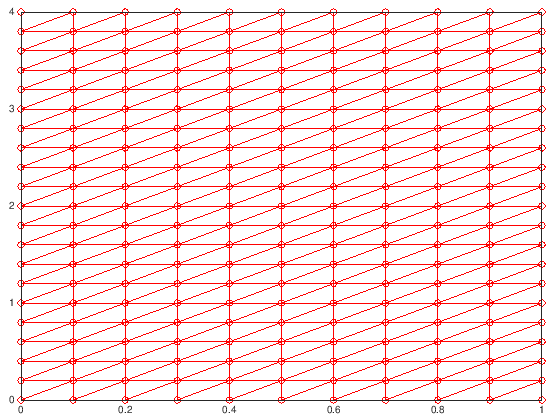

In [24]:
% ======================    Ploting     ===========================

%----------------  Undeformed Mesh  ------------------------
i=1; 
plot([Xel(:,i);Xel(1,i)],[Yel(:,i);Yel(1,i)],'r-o','LineWidth',1.4),
hold on,
for i=2:neltotal
    plot([Xel(:,i);Xel(1,i)],[Yel(:,i);Yel(1,i)],'r-o','LineWidth',1.4),
end
%-----------------------------------------------------------


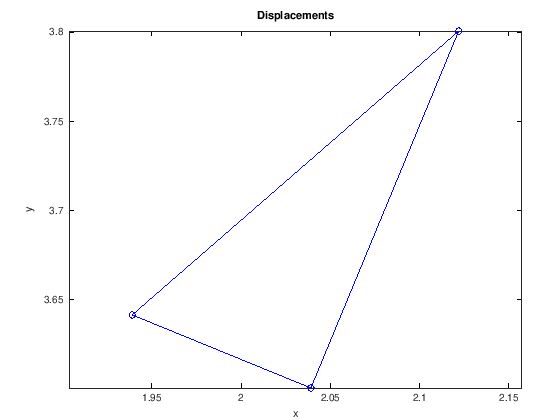

In [25]:
% repeat nodes matrix construction with new desplacements
nodesdef(:,1)= nodes(:,1) + Ux ; 
nodesdef(:,2)= nodes(:,2) + Uy ;

% Build Elements coordinates vectors
for i=1:neltotal
    Xel(:,i)=(nodesdef( Mcon(i,:) , 1 )) ; % on j column has de x of the j-th element 
    Yel(:,i)=(nodesdef( Mcon(i,:) , 2 )) ; % on j column has de y of the j-th element 
end

%----------------  Deformed Mesh  ------------------------
for i=1:neltotal
    plot([Xel(:,i);Xel(1,i)],[Yel(:,i);Yel(1,i)],'b-o','LineWidth',1.5),%y(i))
end

axis equal, xlabel('x'), ylabel('y'),  
title('Displacements')
%===================================================================

In [ ]:
disp('ATENCION: cree la carpeta output y si ya existe vaciela por favor!!')
intIteraciones=input('Ingrese el numero de cuadros para la animacion: ->');

for j=0:intIteraciones
	%vtk_2d (j,intIteraciones,"output","MEF_CST",nnostot,nodes,Ux,Uy,neltotal,Mcon',epsilons,sigmas)
	vtk_3d (j,intIteraciones,"output3d","MEF_CST",t,nnostot,nodes,Ux,Uy,neltotal,Mcon',epsilons,sigmas)
end
disp('listo. Abra paraview para ver los vtks')

In [ ]:
%------------------------------------------------------------------
function v= nodes2dofs (u)
for i=1:length(u)
    v(2*i-1:2*i)=[ 2*u(i)-1 2*u(i)];        
end


%-------------------------------------------------------------


function vtk_2d (intIteracion,intIteraciones,strOutput,strTitulo,intNodos,arrNodos,arrDespX,arrDespY,intElementos,arrConect,arrDeform,arrTensiones)
	format short
	
	intCifras=ceil(log10(intIteraciones+1));	
	iterationid=int2str(intIteracion);
	for i=1:(intCifras-1)
		if intIteracion/(10^i) < 1
			iterationid = strcat(int2str(0),iterationid);
		endif
	endfor
	
	[err,msg] = mkdir ( "output" );
	strArchivo = ["./output/" strOutput "_" iterationid ".vtk"]
	fid=fopen(strArchivo,'w');

	fdisp(fid,"# vtk DataFile Version 2.0")
	fdisp(fid,strTitulo)
	fdisp(fid,"ASCII")
	fdisp(fid,"DATASET UNSTRUCTURED_GRID")
	fdisp(fid,"")

	fdisp(fid,["POINTS " int2str(intNodos) " float"])
	for i=1:intNodos
		fdisp(fid,["   " mat2str(arrNodos(i,1)+intIteracion/intIteraciones*arrDespX(i),5) "   " mat2str(arrNodos(i,2)+intIteracion/intIteraciones*arrDespY(i),5) "   0"])
	endfor

	arrConect = arrConect .- 1;
	fdisp(fid,"")
	fdisp(fid,["CELLS " int2str(intElementos) " " int2str(4*intElementos)])  
	for i=1:intElementos
		fdisp(fid,["   3   " int2str(arrConect(1,i)) "   " int2str(arrConect(2,i)) "   " int2str(arrConect(3,i))])
	endfor

	fdisp(fid,"")
	fdisp(fid,["CELL_TYPES " int2str(intElementos)])  
	for i=1:intElementos
		fdisp(fid,"   5")
	endfor

	fdisp(fid,"")
	fdisp(fid,["POINT_DATA " int2str(intNodos)])
	fdisp(fid,"VECTORS desplazamientos float")
	for i=1:intNodos
		fdisp(fid,["   " mat2str(intIteracion/intIteraciones*arrDespX(i),5) "   " mat2str(intIteracion/intIteraciones*arrDespY(i),5) "   0"])
	endfor

	fdisp(fid,"")
	fdisp(fid,["CELL_DATA " int2str(intElementos)])
	fdisp(fid,"VECTORS deformaciones float")
	for i=1:intElementos
		fdisp(fid,["   " mat2str(intIteracion/intIteraciones*arrDeform(i,1),5) "   " mat2str(intIteracion/intIteraciones*arrDeform(i,2),5) "   " mat2str(intIteracion/intIteraciones*arrDeform(i,3),5)])
	endfor

	fdisp(fid,"")
	fdisp(fid,"VECTORS sigmas float")
	for i=1:intElementos
		fdisp(fid,["   " mat2str(intIteracion/intIteraciones*arrTensiones(i,1),5) "   " mat2str(intIteracion/intIteraciones*arrTensiones(i,2),5) "   " mat2str(intIteracion/intIteraciones*arrTensiones(i,3),5)])
	endfor
	fclose(fid);



function vtk_3d (intIteracion,intIteraciones,strOutput,strTitulo,espesor,intNodos,arrNodos,arrDespX,arrDespY,intElementos,arrConect,arrDeform,arrTensiones)
	format short
	
	intCifras=ceil(log10(intIteraciones+1));
	iterationid=int2str(intIteracion);
	for i=1:(intCifras-1)
		if intIteracion/(10^i) < 1
			iterationid = strcat(int2str(0),iterationid);
		endif
	endfor
	
	[err,msg] = mkdir ( "output" );
	strArchivo = ["./output/" strOutput "_" iterationid ".vtk"] ;
	fid=fopen(strArchivo,'w');

	fdisp(fid,"# vtk DataFile Version 2.0")
	fdisp(fid,strTitulo)
	fdisp(fid,"ASCII")
	fdisp(fid,"DATASET UNSTRUCTURED_GRID")
	fdisp(fid,"")

	fdisp(fid,["POINTS " int2str(2*intNodos) " float"])
	for i=1:intNodos
		fdisp(fid,["   " mat2str(arrNodos(i,1)+intIteracion/intIteraciones*arrDespX(i),5) "   " mat2str(arrNodos(i,2)+intIteracion/intIteraciones*arrDespY(i),5) "   0"])
	endfor
	for i=1:intNodos
		fdisp(fid,["   " mat2str(arrNodos(i,1)+intIteracion/intIteraciones*arrDespX(i),5) "   " mat2str(arrNodos(i,2)+intIteracion/intIteraciones*arrDespY(i),5) "   " mat2str(espesor)])
	endfor
	
	arrConect = arrConect .- 1;
	fdisp(fid,"")
	fdisp(fid,["CELLS " int2str(intElementos) " " int2str(7*intElementos)])  
	for i=1:intElementos
		fdisp(fid,["   6   " int2str(arrConect(1,i)) "   " int2str(arrConect(2,i)) "   " int2str(arrConect(3,i)) "   " int2str(intNodos+arrConect(1,i)) "   " int2str(intNodos+arrConect(2,i)) "   " int2str(intNodos+arrConect(3,i))])
	endfor

	fdisp(fid,"")
	fdisp(fid,["CELL_TYPES " int2str(intElementos)])  
	for i=1:intElementos
		fdisp(fid,"   13")
	endfor

	fdisp(fid,"")
	fdisp(fid,["POINT_DATA " int2str(2*intNodos)])
	fdisp(fid,"VECTORS desplazamientos float")
	for i=1:intNodos
		fdisp(fid,["   " mat2str(intIteracion/intIteraciones*arrDespX(i),5) "   " mat2str(intIteracion/intIteraciones*arrDespY(i),5) "   0"])
	endfor
	for i=1:intNodos
		fdisp(fid,["   " mat2str(intIteracion/intIteraciones*arrDespX(i),5) "   " mat2str(intIteracion/intIteraciones*arrDespY(i),5) "   0"])
	endfor

	fdisp(fid,"")
	fdisp(fid,["CELL_DATA " int2str(intElementos)])
	fdisp(fid,"VECTORS deformaciones float")
	for i=1:intElementos
		fdisp(fid,["   " mat2str(intIteracion/intIteraciones*arrDeform(i,1),5) "   " mat2str(intIteracion/intIteraciones*arrDeform(i,2),5) "   " mat2str(intIteracion/intIteraciones*arrDeform(i,3),5)])
	endfor

	fdisp(fid,"")
	fdisp(fid,"VECTORS sigmas float")
	for i=1:intElementos
		fdisp(fid,["   " mat2str(intIteracion/intIteraciones*arrTensiones(i,1),5) "   " mat2str(intIteracion/intIteraciones*arrTensiones(i,2),5) "   " mat2str(intIteracion/intIteraciones*arrTensiones(i,3),5)])
	endfor
	fclose(fid);



